In [ ]:
from sklearn.impute import SimpleImputer

#from base1 import *
from base2 import *

X_train_1 = pd.read_csv('csv/X_train.csv', index_col='Unnamed: 0')
y_train = pd.read_csv('csv/y_train.csv', index_col='Unnamed: 0')
X_val_1 = pd.read_csv('csv/X_val.csv', index_col='Unnamed: 0')
y_val = pd.read_csv('csv/y_val.csv', index_col='Unnamed: 0')
X_test_1 = pd.read_csv('csv/X_test.csv', index_col='Unnamed: 0')
y_test = pd.read_csv('csv/y_test.csv', index_col='Unnamed: 0')

y_train = (y_train['auop']).astype(str)
y_val = (y_val['auop']).astype(str)
y_test = (y_test['auop']).astype(str)

y_train = y_train.replace({'1': 1, '4': 0})
y_val = y_val.replace({'1': 1, '4': 0})
y_test = y_test.replace({'1': 1, '4': 0})

X_train = X_train_1
X_val = X_val_1
X_test = X_test_1 

col_names = X_train.columns.to_list()
col_names.remove("X23")
col_names.remove("X140")

# Calculate frequency encoding on the training set
frequency_encoding = X_train['X140'].value_counts(normalize=True)
# Map the frequencies to the sector column in each dataset
X_train['X141'] = X_train['X140'].map(frequency_encoding)
X_val['X141'] = X_val['X140'].map(frequency_encoding)
X_test['X141'] = X_test['X140'].map(frequency_encoding)
# Fill any missing values that might arise if a category in val/test wasn't in train
X_val['X141'].fillna(0, inplace=True)
X_test['X141'].fillna(0, inplace=True)

# Drop column 'X140' from each DataFrame
X_train = X_train.drop(columns=['X140'])
X_val = X_val.drop(columns=['X140'])
X_test = X_test.drop(columns=['X140'])

runned!
['PCA', 'SMOTE', 'SimpleImputer', 'StandardScaler', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'create_pca_table', 'np', 'pca_on_train_and_transform_full_data', 'pd', 'plt', 'preprocess_and_apply_smote1', 'remove_outliers_iqr', 'scale_columns1']


<ipython-input-1-a27375b3344e>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'1': 1, '4': 0})
<ipython-input-1-a27375b3344e>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_val = y_val.replace({'1': 1, '4': 0})
<ipython-input-1-a27375b3344e>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

In [ ]:
# Deal with missing values in the features 
missing_threshold = 0.8
missing_train = X_train.isnull().mean()
cols_to_drop = missing_train[missing_train > missing_threshold].index
# Drop the identified columns from both the training and test sets
X_train = X_train.drop(cols_to_drop, axis=1)
X_val = X_val.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)
print(f"Columns dropped: {list(cols_to_drop)}")

col_names = X_train.columns.to_list()
col_names.remove("X23")

Columns dropped: []


In [ ]:
# remove outliers
X_train, y_train, removed_counts = k.remove_outliers_iqr(X_train, y_train, col_names, min_outliers= 20)
print("Rows removed per class:", removed_counts)

# Deal with missing values
max_missing = 17
X_train = X_train[X_train.isnull().sum(axis=1) < max_missing]
y_train = y_train.loc[X_train.index]

Rows removed per class: {1: 4807, 0: 2046}


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [ ]:
# Replace 'inf' and '-inf' with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_val.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Initialize SimpleImputer with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the training data and transform it
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# Apply the same imputer to the validation and test sets (without refitting)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

Class distribution after SMOTE: auop
1    18630
0    18630
Name: count, dtype: int64
Data has been split, outliers removed, and data scaled.


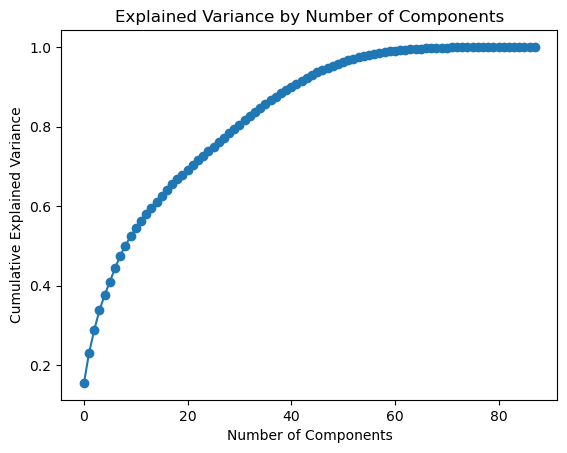

   Principal Component  Eigenvalue  Explained Variance  \
0                 PC_1   13.589286            0.155763   
1                 PC_2    6.654587            0.076276   
2                 PC_3    5.023126            0.057576   
3                 PC_4    4.273516            0.048984   
4                 PC_5    3.304498            0.037877   
5                 PC_6    2.968826            0.034029   
6                 PC_7    2.891008            0.033137   
7                 PC_8    2.768466            0.031733   
8                 PC_9    2.234004            0.025607   
9                PC_10    2.017816            0.023129   
10               PC_11    1.723181            0.019751   
11               PC_12    1.631595            0.018702   
12               PC_13    1.536901            0.017616   
13               PC_14    1.406197            0.016118   
14               PC_15    1.322141            0.015155   
15               PC_16    1.308799            0.015002   
16            

In [ ]:
# Use SMOTE to oversample the minority class in the training set
smote = SMOTE()
X_train_resampled, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", pd.Series(y_train.value_counts()))

# Scale the data
X_train, X_val, X_test = k.scale_columns1(X_train_resampled, X_val, X_test, col_names)
print("Data has been split, outliers removed, and data scaled.")

X_train_full, X_val_full, X_test_full, explained_variance, eigenvalues = k.pca_on_train_and_transform_full_data(X_train, X_val, X_test)

pca_table = k.create_pca_table(explained_variance, eigenvalues)
print(pca_table)

In [ ]:
# Select columns
X_train_svm = X_train_full.iloc[:, :23]
X_val_svm = X_val_full.iloc[:, :23]
X_test_svm = X_test_full.iloc[:, :23]

In [ ]:
# Create an SVM classifier with RBF kernel (Saeedi, 2021)
svm_rbf = SVC(kernel='rbf')
# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(svm_rbf, X_train_svm, y_train, cv=10)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
# Train the SVM model on the full training set
svm_rbf.fit(X_train_svm, y_train)
# Evaluate on the validation set
y_val_pred = svm_rbf.predict(X_val_svm)
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))
# Optionally, you can evaluate on the test set as well
y_test_pred = svm_rbf.predict(X_test_svm)
print("Test set classification report:")
print(classification_report(y_test, y_test_pred))

Cross-validation scores: [0.73537305 0.72785829 0.7396672  0.71685454 0.74449812 0.73886205
 0.72544283 0.73483629 0.74852389 0.74074074]
Mean cross-validation score: 0.7352657004830918
Validation set classification report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      4078
           1       0.82      0.84      0.83      9468

    accuracy                           0.75     13546
   macro avg       0.71      0.70      0.70     13546
weighted avg       0.75      0.75      0.75     13546

Test set classification report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      4071
           1       0.82      0.82      0.82      9379

    accuracy                           0.75     13450
   macro avg       0.70      0.70      0.70     13450
weighted avg       0.75      0.75      0.75     13450



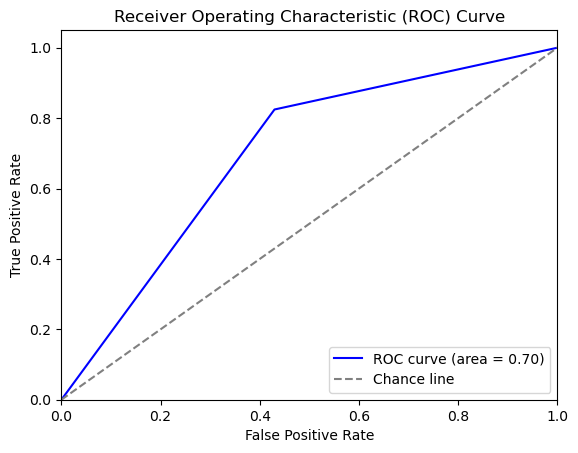

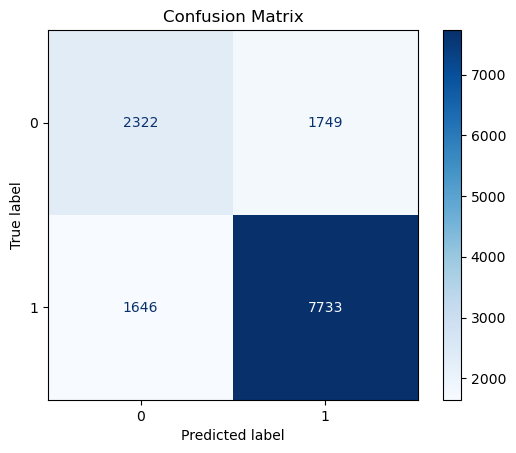

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = y_test
y_pred_proba = y_test_pred 
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()